In [11]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as lg
import seaborn as sns

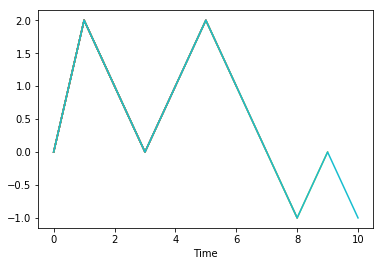

In [17]:
#parameters 
p = 0.5
q = 1 - p

t = 0
tmax = 10

sum_x = 1 #initial starting place

y_0 = 0
Y = [y_0]

while t <tmax:
    
    r = np.random.rand()
    t += 1
    if r<p:
        x = 1
    else:
        x = -1
    sum_x = sum_x + x
    Y.append(sum_x)
    
    
    plt.xlabel('Time')
    plt.xlabel('')
    plt.plot(Y)

In [17]:
def SRWalk(p, tmax, N, L):
    
    q = 1-p
    X = np.random.rand(N,tmax)
    
    X[X<p] = 1
    X[X!=1] = -1
    
    Y = np.zeros((N,tmax))
    
    for i in range(0, N):
        
        X[i][0] = 1 #start at one
        Y[i][0] = 1
        for j in range(1,tmax):
        
            Y[i,j] = Y[i,j-1]+X[i,j]
            if Y[i,j] > L :
                Y[i,j]=10
            elif Y[i,j] < 1:
                Y[i,j] =1
    return X, Y

In [18]:
p=0.75
t = 100
N = 500
L=10

for i in range(1,500):    
    S = SRWalk(p,t,N,L)  
    X = S[0]
    Y = S[1]

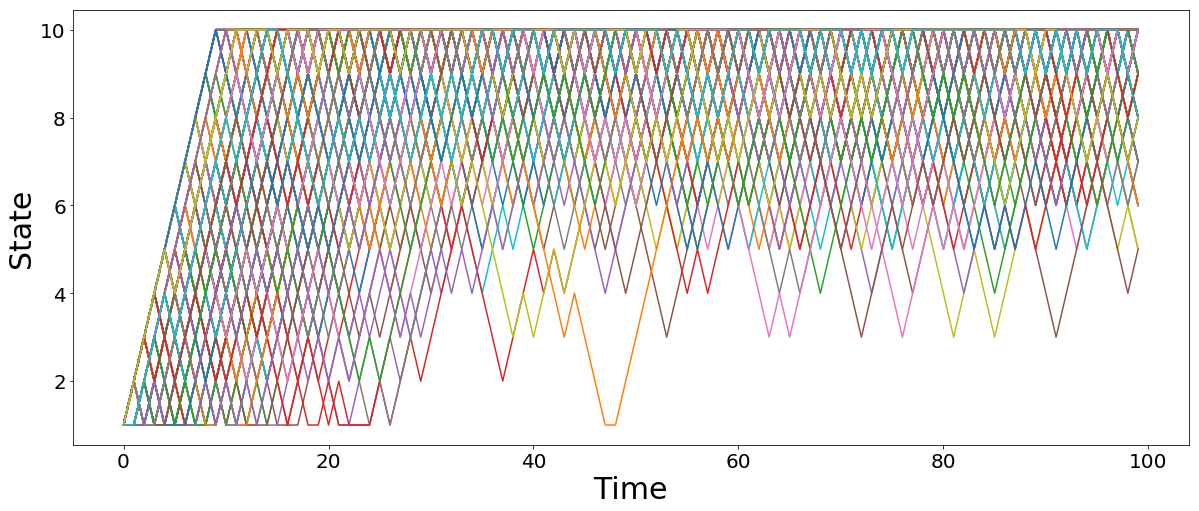

In [19]:
plt.figure(figsize = (20,8))

for k in range(0, N):
    
    plt.plot(range(t), Y[k,:])
    plt.xlabel('Time',fontsize=30)
    plt.ylabel('State',fontsize=30)
    plt.tick_params(axis='both', labelsize=20)

[3.38707492e-05 1.35482997e-04 4.40319740e-04 1.35482997e-03
 4.09836066e-03 1.23289527e-02 3.70207289e-02 1.11096057e-01
 3.33322043e-01 1.00000000e+00]


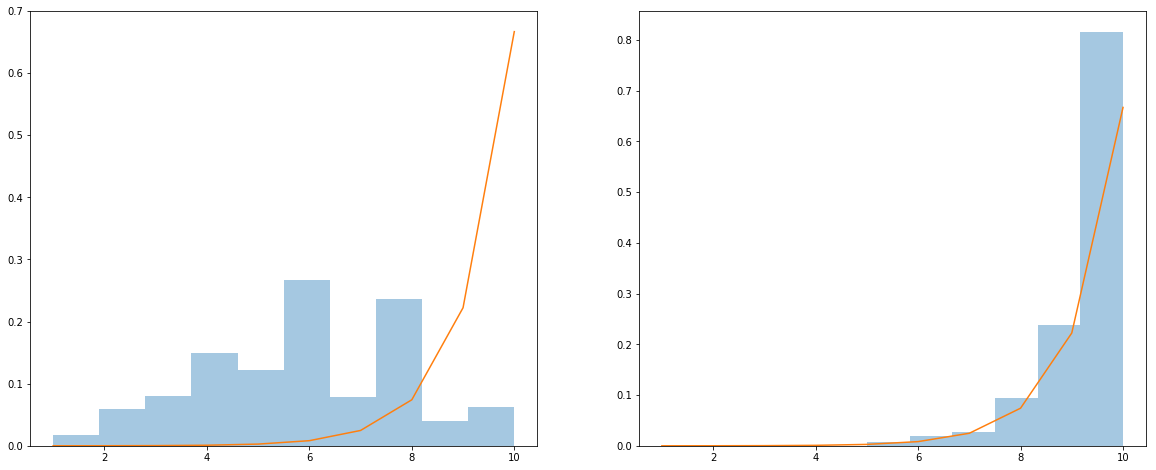

In [23]:
q=1-p
pi=np.array([1,(p/q),(p/q)**2,(p/q)**3,(p/q)**4,(p/q)**5,(p/q)**6,(p/q)**7,(p/q)**8,(p/q)**9])  #theorectical dist.
norm = sum(pi)
pi = pi/norm

print(np.cumsum(pi))

plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.distplot(Y[:,9],bins = 10,kde=False,norm_hist = True)
plt.plot(range(1,L+1),pi)

plt.subplot(1,2,2)
sns.distplot(Y[:,99], bins = len(np.unique(Y[:,99])),kde=False,norm_hist = True)
plt.plot(range(1,L+1),pi)

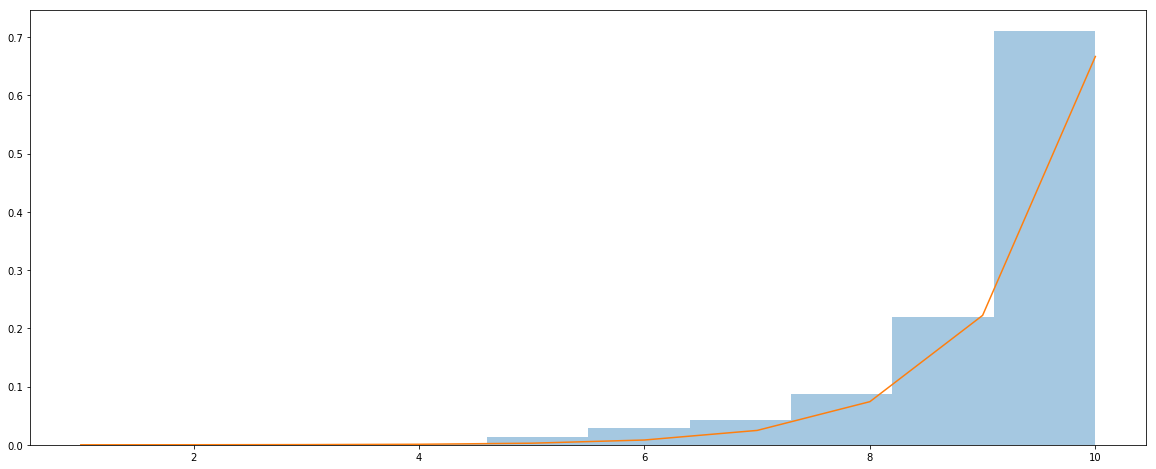

In [21]:
t1 = 500
N1 = 1
p=0.75
L=10

S1 = SRWalk(p,t1,N1,L)
X1 = S1[0]
Y1 = S1[1]

plt.figure(figsize = (20,8))
sns.distplot(Y1, bins = len(np.unique(Y1)),kde=False,norm_hist = True)
plt.plot(range(1,L+1),pi)